<a href="https://colab.research.google.com/github/GabrielFerla7/Checkpoint-ML/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Nome: Gabriel Ferla Martins dos Anjos
### RM: 93344

## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [225]:
dados = pd.read_csv( 'aptos.csv', sep=',' )

In [226]:
dados.head(30)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


In [227]:
dados.tail(30)

,metros,valor,quartos,vagas,reformado,bairro
103,53,220.0,2,1,1.0,Santa Teresinha
104,58,200.0,2,1,0.0,Santa Teresinha
105,44,237.0,2,2,0.0,Ferrazopolis
106,50,250.0,2,2,1.0,Santa Teresinha
107,73,565.0,3,2,0.0,Baeta Neves
108,77,359.0,2,2,0.0,Centro
109,65,340.0,2,2,1.0,Centro
110,56,247.0,2,1,0.0,Planalto
111,126,736.0,3,3,0.0,Iraja
112,96,560.0,3,1,0.0,Centro


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- metros: Tamanho do apartamento em m2
- valor: valor do imovel 
- quartos: quantidade de quartos
- vagas: quantiade de vagas 
- reformado: mostra se o apartamento já foi reformado
- bairro: bairro onde se localiza o imovel

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  O Valor do Apartamento pode aumentar dependendo de qual bairro ele esta localizado, e tambem quantos metros quadrados, quartos e vagas ele tiver respectivamente.
2.  Dependendo se o Apartamento passou ou não por uma reforma pode alterar o valor final dele 

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [228]:
dados.describe()

,metros,valor,quartos,vagas,reformado
count,114.000000,113.000000,114.000000,114.000000,113.000000
mean,79.500000,401.539823,2.543860,1.675439,0.513274
std,27.516126,171.370059,0.582037,0.722528,0.502050
min,43.000000,188.000000,1.000000,0.000000,0.000000
25%,56.000000,255.000000,2.000000,1.000000,0.000000
50%,71.000000,347.000000,3.000000,2.000000,1.000000
75%,99.000000,515.000000,3.000000,2.000000,1.000000
max,199.000000,880.000000,4.000000,4.000000,1.000000


In [229]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     114 non-null    int64  
 1   valor      113 non-null    float64
 2   quartos    114 non-null    int64  
 3   vagas      114 non-null    int64  
 4   reformado  113 non-null    float64
 5   bairro     114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


Text(0.5, 1.0, 'Valor dos Imoveis de acordo com seus M2')

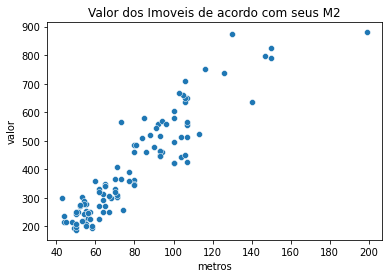

In [230]:
sns.scatterplot(x='metros', y='valor', data=dados)
plt.title('Valor dos Imoveis de acordo com seus M2')

Text(0.5, 1.0, 'Valor do Imovel em relação a quantidade de quartos')

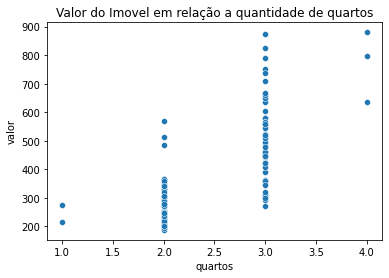

In [231]:
sns.scatterplot(x='quartos', y='valor', data=dados)
plt.title('Valor do Imovel em relação a quantidade de quartos')

Text(0.5, 1.0, 'Valor dos apartamentos em relação as vagas')

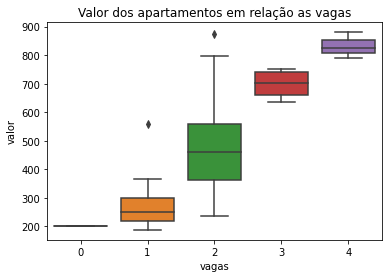

In [232]:
sns.boxplot(x='vagas', y='valor', data=dados)
plt.title('Valor dos apartamentos em relação as vagas')

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão Linear
2. Random Forest

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Regressão Linear:  É um método usado para treinar um modelo que pode prever um valor, com base no conjunto de valores de entrada. O algoritmo de regressão Linear é um método usado para modelar as relações entre as variáveis de entrada e saída para fazer previsões precisas.
2. Random Forest: É um algoritmo que cria de forma aleatória várias Árvores de Decisão (Decision Trees) e combina o resultado de todas elas para chegar no resultado final.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
dados_2 = dados[['metros', 'quartos', 'vagas', 'reformado', 'valor']].dropna()

In [188]:
x = dados_2[['metros', 'quartos', 'vagas', 'reformado']]
y = dados_2['valor']

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

### Regressão Linear

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [191]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [192]:
y_predicoes = linear.predict(x_test) 

In [193]:
linear_train_absolute = mean_absolute_error(y_train, linear.predict(x_train))
linear_test_absolute = mean_absolute_error(y_test, linear.predict(x_test))

In [194]:
linear_train_squared = mean_squared_error(y_train, linear.predict(x_train))
linear_test_squared = mean_squared_error(y_test, linear.predict(x_test))

In [195]:
linear_train_score = r2_score(y_train, linear.predict(x_train))
linear_test_score = r2_score(y_test, linear.predict(x_test))

In [196]:
print(linear_train_absolute)
print(linear_test_absolute)

47.928511101958875
58.2808574982244


In [197]:
print(linear_train_squared)
print(linear_test_squared)

3924.0580513535106
5828.098149841699


In [198]:
print(linear_train_score)
print(linear_test_score)

0.8589110644242273
0.8201746232121241


### Algoritmo 2

### Random Forest

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [212]:
random = RandomForestRegressor(random_state=42)
random.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [213]:
y_predicoes = random.predict(x_test)

In [214]:
random_train_absolute = mean_absolute_error(y_train, random.predict(x_train))
random_test_absolute = mean_absolute_error(y_test, random.predict(x_test))

In [215]:
random_train_squared = mean_squared_error(y_train, random.predict(x_train))
random_test_squared = mean_squared_error(y_test, random.predict(x_test))

In [216]:
random_train_score = r2_score(y_train, random.predict(x_train))
random_test_score = r2_score(y_test, random.predict(x_test))

In [217]:
print(random_train_absolute)
print(random_test_absolute)


25.501629680504685
58.74211986461251


In [218]:
print(random_train_squared)
print(random_test_squared)

1382.604915311054
7256.3420975517265


In [220]:
print(random_train_score)
print(random_test_score)

0.9502886416892372
0.7761063011903105


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 0.85 | 0.95 |
| teste  | 0.82 | 0.77 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O Random Forest foi melhor para esse caso pois teve mais acertividade no treino além da Regressão Linear ser muito inconsistente para o formato desejado de ML, a arvore de decisão foi bem mais acertiva nos preços dos imoveis q é a prosposta desejada para o Aprendizado

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [221]:
apartamento_valor = pd.DataFrame({
    'metros': [72],
    'quartos': [2],
    'vagas': [2],
    'reformado': [1],
})

In [222]:
valor = random.predict(apartamento_valor)[0]

In [223]:
print(f'O apartamento está valendo: R$ {valor:.2f}')

O apartamento está valendo: R$ 350.68


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim foi um Resultado bem Satisfatorio, observando os apartamentos dentro do dataset a gente tem um valor bem proximo ao obtido, um pouco acima do esperado por min pela minha analise, pode existir um modelo melhor porem o RF teve um resultado bom pelos dados que tinhamos acesso 

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Seria bom para o modelo ter mais dados para utilizar, pois o random forest como mostrado em aula ela se baseia nos dados para ir fazendo a sua escolha como se tivessemos varias arvores de decisão, então se tivessemos mais dados como imobiliarias que constroem, padrão do condominio entre outros poderia mudar para termos uma acertividade melhor dentro do nosso modelo, e também testar outros modelos para ver como funcionaria o aprendizado deles nessa mesma situação 